<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(_2)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_-2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-2_n30.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,91.145916,95.435123,22.324054,-0.001518,218.903574,218.903520,0.000055
1,0.0,1.0,49.702676,58.791629,96.992505,0.001194,215.488004,215.490713,-0.002709
2,0.0,2.0,59.618715,24.313133,48.217774,-0.000682,142.148941,142.141384,0.007556
3,0.0,3.0,34.236554,53.735092,51.971321,-0.002279,149.940687,149.943440,-0.002752
4,0.0,4.0,43.357100,46.285234,21.277339,0.003117,120.922788,120.914748,0.008040
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,82.436263,84.547659,58.233433,0.003475,235.220829,235.229186,-0.008357
29996,999.0,26.0,74.258170,36.604036,71.017144,-0.010507,191.868843,191.866137,0.002706
29997,999.0,27.0,26.046115,96.589930,23.828491,-0.003355,156.461181,156.467250,-0.006070
29998,999.0,28.0,71.946065,83.155905,29.978774,0.002257,195.083001,195.087434,-0.004433


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    91.145916  95.435123  22.324054 -0.001518  218.903574   
      1.0    49.702676  58.791629  96.992505  0.001194  215.488004   
      2.0    59.618715  24.313133  48.217774 -0.000682  142.148941   
      3.0    34.236554  53.735092  51.971321 -0.002279  149.940687   
      4.0    43.357100  46.285234  21.277339  0.003117  120.922788   
...                ...        ...        ...       ...         ...   
999.0 25.0   82.436263  84.547659  58.233433  0.003475  235.220829   
      26.0   74.258170  36.604036  71.017144 -0.010507  191.868843   
      27.0   26.046115  96.589930  23.828491 -0.003355  156.461181   
      28.0   71.946065  83.155905  29.978774  0.002257  195.083001   
      29.0   45.223417  76.124154  72.741153 -0.017971  204.070753   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    218.903520  0.000055  
      1.0    215.490713 -0.002709  
      2.0    142.141384  0.007556  
      3.0    149.943440 -0.002752  
      4.0    120.914748  0.008040  
...                 ...       ...  
999.0 25.0   235.229186 -0.008357  
      26.0   191.866137  0.002706  
      27.0   156.467250 -0.006070  
      28.0   195.087434 -0.004433  
      29.0   204.089041 -0.018288  

[30000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    91.145916  95.435123  22.324054 -0.001518  218.903574   
      1.0    49.702676  58.791629  96.992505  0.001194  215.488004   
      2.0    59.618715  24.313133  48.217774 -0.000682  142.148941   
      3.0    34.236554  53.735092  51.971321 -0.002279  149.940687   
      4.0    43.357100  46.285234  21.277339  0.003117  120.922788   
...                ...        ...        ...       ...         ...   
999.0 25.0   82.436263  84.547659  58.233433  0.003475  235.220829   
      26.0   74.258170  36.604036  71.017144 -0.010507  191.868843   
      27.0   26.046115  96.589930  23.828491 -0.003355  156.461181   
      28.0   71.946065  83.155905  29.978774  0.002257  195.083001   
      29.0   45.223417  76.124154  72.741153 -0.017971  204.070753   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    218.903520  0.000055  
      1.0    215.490713 -0.002709  
      2.0    142.141384  0.007556  
      3.0    149.943440 -0.002752  
      4.0    120.914748  0.008040  
...                 ...       ...  
999.0 25.0   235.229186 -0.008357  
      26.0   191.866137  0.002706  
      27.0   156.467250 -0.006070  
      28.0   195.087434 -0.004433  
      29.0   204.089041 -0.018288  

[30000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,91.145916,95.435123,22.324054,-0.001518,218.903574,218.903520,0.000055
1,0.0,1.0,49.702676,58.791629,96.992505,0.001194,215.488004,215.490713,-0.002709
2,0.0,2.0,59.618715,24.313133,48.217774,-0.000682,142.148941,142.141384,0.007556
3,0.0,3.0,34.236554,53.735092,51.971321,-0.002279,149.940687,149.943440,-0.002752
4,0.0,4.0,43.357100,46.285234,21.277339,0.003117,120.922788,120.914748,0.008040
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,82.436263,84.547659,58.233433,0.003475,235.220829,235.229186,-0.008357
29996,999.0,26.0,74.258170,36.604036,71.017144,-0.010507,191.868843,191.866137,0.002706
29997,999.0,27.0,26.046115,96.589930,23.828491,-0.003355,156.461181,156.467250,-0.006070
29998,999.0,28.0,71.946065,83.155905,29.978774,0.002257,195.083001,195.087434,-0.004433


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    91.145916  95.435123  22.324054 -0.001518  218.903574   
      1.0    49.702676  58.791629  96.992505  0.001194  215.488004   
      2.0    59.618715  24.313133  48.217774 -0.000682  142.148941   
      3.0    34.236554  53.735092  51.971321 -0.002279  149.940687   
      4.0    43.357100  46.285234  21.277339  0.003117  120.922788   
...                ...        ...        ...       ...         ...   
999.0 25.0   82.436263  84.547659  58.233433  0.003475  235.220829   
      26.0   74.258170  36.604036  71.017144 -0.010507  191.868843   
      27.0   26.046115  96.589930  23.828491 -0.003355  156.461181   
      28.0   71.946065  83.155905  29.978774  0.002257  195.083001   
      29.0   45.223417  76.124154  72.741153 -0.017971  204.070753   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    218.903520  0.000055  
      1.0    215.490713 -0.002709  
      2.0    142.141384  0.007556  
      3.0    149.943440 -0.002752  
      4.0    120.914748  0.008040  
...                 ...       ...  
999.0 25.0   235.229186 -0.008357  
      26.0   191.866137  0.002706  
      27.0   156.467250 -0.006070  
      28.0   195.087434 -0.004433  
      29.0   204.089041 -0.018288  

[30000 rows x 7 columns]

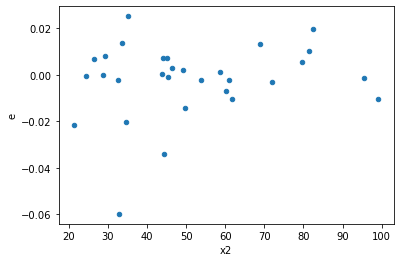

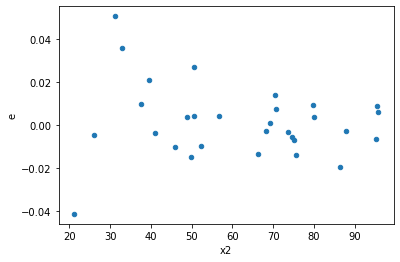

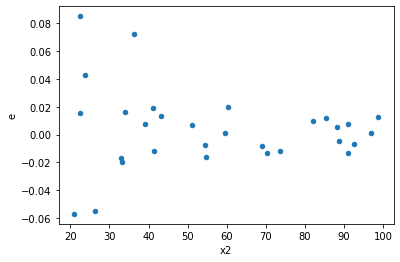

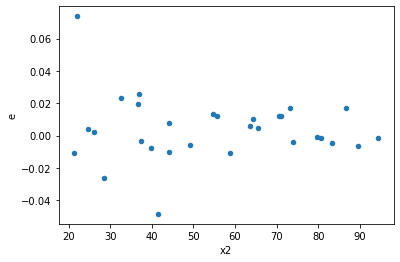

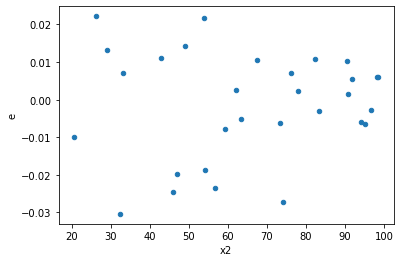

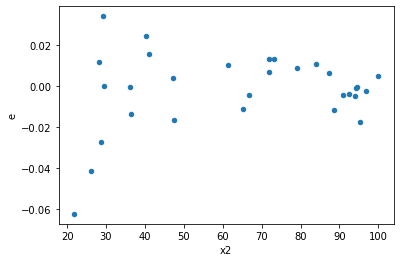

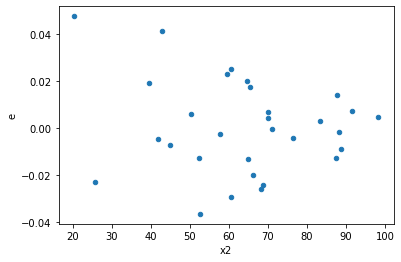

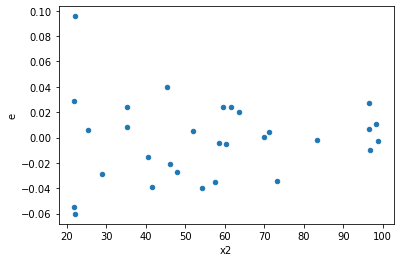

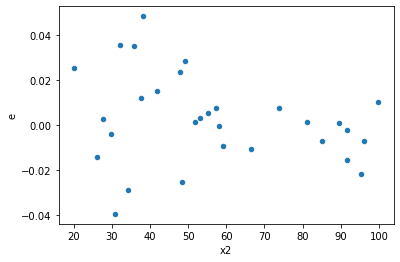

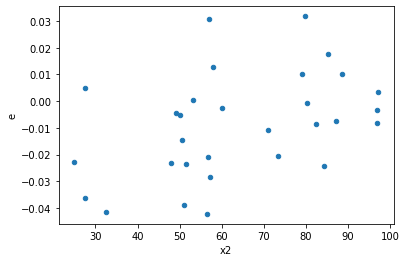

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,19.0,5.0,0.004390021773892079,0.0018980579025196908,0.0002310537775732673,0.0003796115805039382,1.6429576892918927,0.6113026486989384,0.6943486756505308,0.3056513243494692,Reject001=1 : Homoscedasticity
2.0,16.0,8.0,0.011669601404027612,0.009232055789092466,0.0007293500877517257,0.0011540069736365583,1.5822401244837963,0.5197852739797959,0.740107363010102,0.25989263698989795,Reject001=1 : Homoscedasticity
3.0,16.0,8.0,0.0030935553395705397,0.003487858129622158,0.00019334720872315873,0.00043598226620276975,2.2549188534033835,0.24525491635313945,0.8773725418234303,0.12262745817656973,Reject001=1 : Homoscedasticity
5.0,13.0,11.0,0.0008850587513169873,0.002383464198669327,6.808144240899903e-05,0.00021667856351539338,3.182637674062451,0.06240756062799657,0.9687962196860017,0.031203780313998286,Reject001=1 : Homoscedasticity
7.0,10.0,14.0,0.002682305154511825,0.017407009999682668,0.0002682305154511825,0.0012433578571201906,4.635407925264491,0.0096860961210683,0.9951569519394659,0.00484304806053415,Reject001=0 : Heteroscedasticity
8.0,17.0,7.0,0.004912702903130881,0.004789859893117747,0.00028898252371358126,0.000684265699016821,2.3678445679816127,0.24986896661435898,0.8750655166928205,0.12493448330717949,Reject001=1 : Homoscedasticity
9.0,17.0,7.0,0.0042265587515753775,0.0028444553843084966,0.00024862110303384575,0.00040635076918692806,1.6344178520180161,0.52241974556438,0.73879012721781,0.26120987278219,Reject001=1 : Homoscedasticity
17.0,6.0,18.0,0.0023018658210055953,0.010876534104997018,0.00038364430350093254,0.0006042518947220565,1.5750315831825918,0.42283247046754235,0.7885837647662288,0.21141623523377118,Reject001=1 : Homoscedasticity
18.0,19.0,5.0,0.008039825464541019,0.005135602676085629,0.00042314870866005363,0.0010271205352171257,2.4273275900323896,0.3309498019758632,0.8345250990120684,0.1654749009879316,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,7.0,17.0,0.002965724976532113,0.00266050714155084,0.0004236749966474447,0.00015650042009122587,0.36938790660203985,0.18458286284186004,Reject001=1 : Homoscedasticity
1.0,19.0,5.0,0.004390021773892079,0.0018980579025196908,0.0002310537775732673,0.0003796115805039382,1.6429576892918927,0.6113026486989384,Reject001=1 : Homoscedasticity
2.0,16.0,8.0,0.011669601404027612,0.009232055789092466,0.0007293500877517257,0.0011540069736365583,1.5822401244837963,0.5197852739797959,Reject001=1 : Homoscedasticity
3.0,16.0,8.0,0.0030935553395705397,0.003487858129622158,0.00019334720872315873,0.00043598226620276975,2.2549188534033835,0.24525491635313945,Reject001=1 : Homoscedasticity
4.0,11.0,13.0,0.0030159358507990323,0.001789505620233907,0.0002741759864362757,0.0001376542784795313,0.5020654079474793,0.25974860544567246,Reject001=1 : Homoscedasticity
5.0,13.0,11.0,0.0008850587513169873,0.002383464198669327,6.808144240899903e-05,0.00021667856351539338,3.182637674062451,0.06240756062799657,Reject001=1 : Homoscedasticity
6.0,11.0,13.0,0.007456146581771906,0.0033981931753657183,0.0006778315074338096,0.00026139947502813217,0.38564078559546433,0.12192912927563848,Reject001=1 : Homoscedasticity
7.0,10.0,14.0,0.002682305154511825,0.017407009999682668,0.0002682305154511825,0.0012433578571201906,4.635407925264491,0.0096860961210683,Reject001=0 : Heteroscedasticity
8.0,17.0,7.0,0.004912702903130881,0.004789859893117747,0.00028898252371358126,0.000684265699016821,2.3678445679816127,0.24986896661435898,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      807
Reject001=0 : Heteroscedasticity    193
Name: Result_test, dtype: int64